# Data Preprocessing

In [1]:
# Data wrangling
import pandas as pd
import numpy as np

# Data visualisation
import seaborn as sns
import matplotlib.pyplot as plt

# Machine learning
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

import warnings
warnings.filterwarnings('ignore')  # Warnings in the notebook

First of all, we load the dataset and visualize it.

Notice we are dropping two features we consider useless:
- `flight`, which is the identifier of the aircraft
- `Unnamed: 0`, which is the number of the record in the database

In [2]:
data = pd.read_csv('../data/Clean_Dataset.csv').drop(['flight','Unnamed: 0'], axis=1)
data.head()

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [3]:
print("Data shape: ", data.shape)

Data shape:  (300153, 10)


We convert the price from rupees to euro, so that the dataset is more readable.

In [4]:
CONVERSION_RATE = 0.011

data['price'] = data['price'] * CONVERSION_RATE

Now, we want to plot some statistics about our dataset.

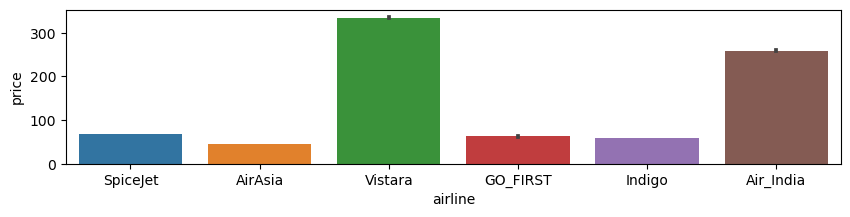

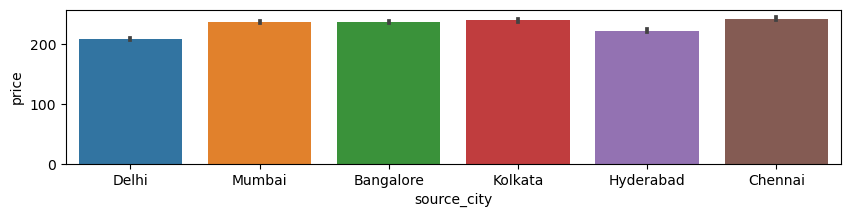

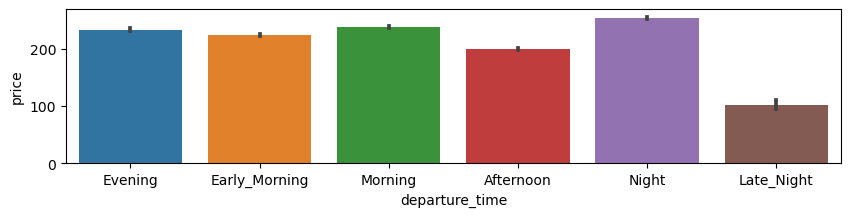

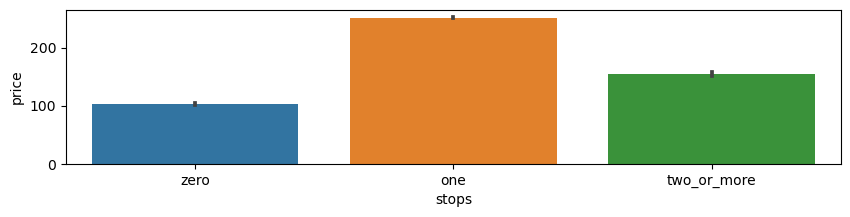

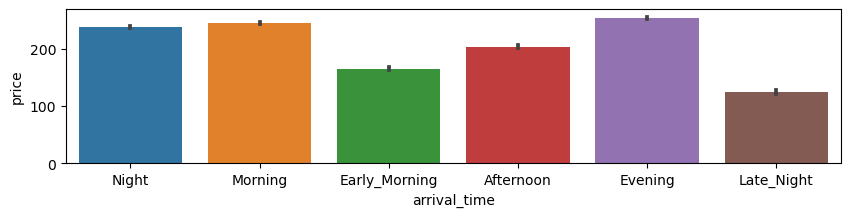

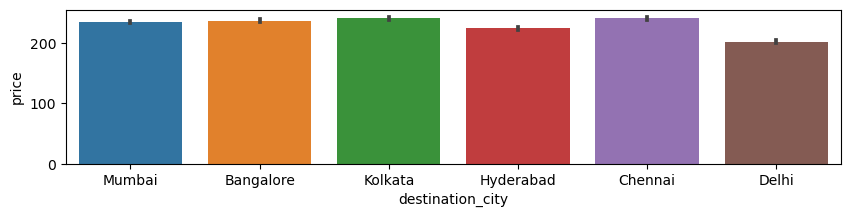

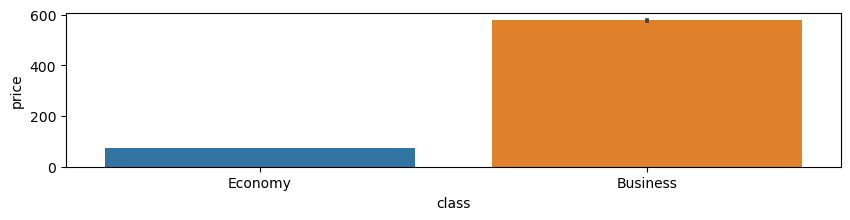

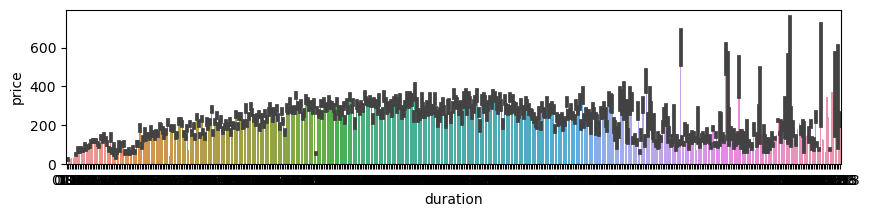

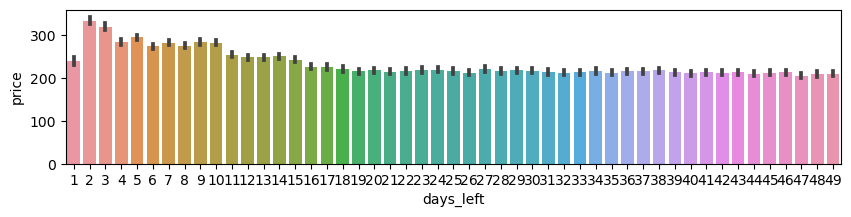

In [5]:
for i in data.columns.drop(['price']):
    plt.figure(figsize = (10, 2))
    sns.barplot(x = i, y='price', data = data)

Text(0.5, 1.0, 'Distribution of price')

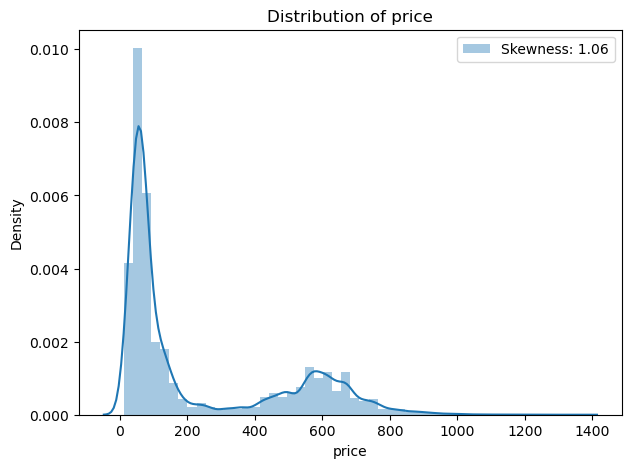

In [6]:
plt.figure(figsize = (7, 5))
sns.distplot(data['price'], label = 'Skewness: {:.2f}'.format(data['price'].skew()))
plt.legend(loc = 'best')
plt.title('Distribution of price')

We can see that most of features are categorical. Therefore, we proceed to encode them properly.

In [7]:
# time - we use an ordinal encoder
time = [['Early_Morning', 'Morning', 'Afternoon', "Evening", "Night", "Late_Night"]]
oe_time = OrdinalEncoder(categories = time)

data['departure_time'] = oe_time.fit_transform(np.array(data['departure_time']).reshape(-1, 1))
data['arrival_time'] = oe_time.transform(np.array(data['arrival_time']).reshape(-1, 1))
#display(data)

In [8]:
# stops - we use an ordinal encoder
escales = [['zero', 'one', 'two_or_more']]
oe_escales = OrdinalEncoder(categories = escales)

data['stops'] = oe_escales.fit_transform(np.array(data['stops']).reshape(-1, 1))
#display(data)

In [9]:
# class - we use an ordinal encoder
f_class = [['Economy', 'Business']]
oe_class = OrdinalEncoder(categories = f_class)

data['class'] = oe_class.fit_transform(np.array(data['class']).reshape(-1, 1))
#display(data)

In [10]:
# city - we use a one hot encoder
ohe = OneHotEncoder(sparse = False)

# fit the encoder
ohe.fit(np.array(data['source_city']).reshape(-1, 1))

cat = list(ohe.categories_[0])

cat_source = [s + '_source' for s in cat]
cat_dest = [s + '_dest' for s in cat]

data[cat_source] = ohe.transform(np.array(data['source_city']).reshape(-1, 1))
data[cat_dest] = ohe.transform(np.array(data['destination_city']).reshape(-1, 1))

# drop source and destination
data.drop(labels=['source_city', 'destination_city'], inplace=True, axis='columns')

#display(data)

In [11]:
# airline - we use a one hot encoder
ohe = OneHotEncoder(sparse = False)

# fit the encoder
ohe.fit(np.array(data['airline']).reshape(-1, 1))

cat = list(ohe.categories_[0])

data[cat] = ohe.transform(np.array(data['airline']).reshape(-1, 1))

# drop original column
data.drop(labels=['airline'], inplace=True, axis='columns')

display(data)

,departure_time,stops,arrival_time,class,duration,days_left,price,Bangalore_source,Chennai_source,Delhi_source,...,Delhi_dest,Hyderabad_dest,Kolkata_dest,Mumbai_dest,AirAsia,Air_India,GO_FIRST,Indigo,SpiceJet,Vistara
0,3.0,0.0,4.0,0.0,2.17,1,65.483,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,1.0,0.0,2.33,1,65.483,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,2.17,1,65.516,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,2.0,0.0,2.25,1,65.505,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,1.0,0.0,1.0,0.0,2.33,1,65.505,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300148,1.0,1.0,3.0,1.0,10.08,49,761.915,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
300149,2.0,1.0,4.0,1.0,10.42,49,848.155,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
300150,0.0,1.0,4.0,1.0,13.83,49,870.089,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
300151,0.0,1.0,3.0,1.0,10.00,49,897.435,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [12]:
# export
data.to_csv('../data/ready.csv')